In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_data = pd.read_csv("gld_price_data.csv")

In [4]:
gold_data.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [5]:
gold_data.tail(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.8000,15.3800,1.208123
2281,5/1/2018,2654.800049,123.709999,13.6100,15.2400,1.199156
2282,5/2/2018,2635.669922,123.650002,13.6700,15.4200,1.195100
2283,5/3/2018,2629.729980,124.279999,13.8200,15.4600,1.198926
2284,5/7/2018,2672.629883,124.570000,14.1000,15.5200,1.193374
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
non_numeric_columns = gold_data.select_dtypes(exclude=['float', 'int']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['Date'], dtype='object')


In [14]:
# Convert date column (example: 'Date') to datetime
gold_data['Date'] = pd.to_datetime(gold_data['Date'], errors='coerce')

# Drop non-numeric columns
gold_data = gold_data.select_dtypes(include=['float', 'int'])


In [15]:
print("Missing values:\n", gold_data.isnull().sum())

# Drop rows with missing values or fill them with appropriate values
gold_data = gold_data.dropna()  # or use gold_data.fillna(value)


Missing values:
 SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


In [16]:
correlation = gold_data.corr()
print(correlation)



              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

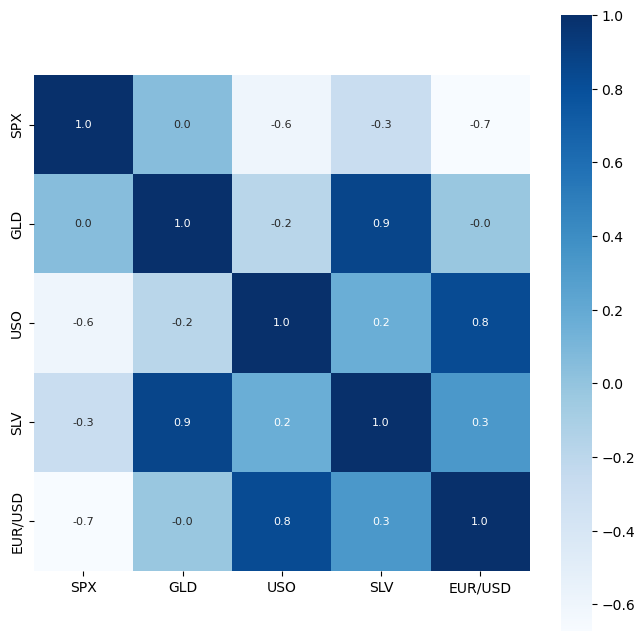

In [17]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [18]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_4440\4227780549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

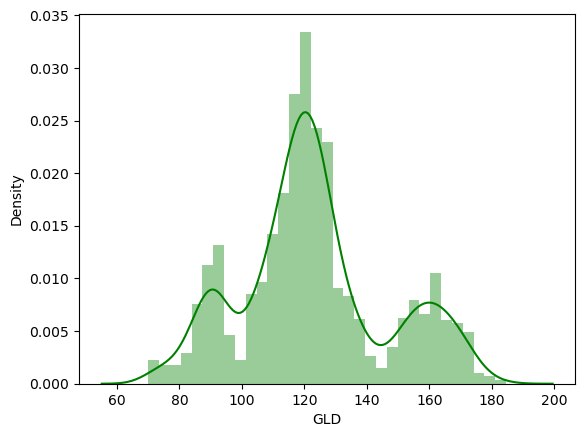

In [19]:
sns.distplot(gold_data['GLD'],color='green')

In [22]:
print(gold_data.columns)


Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')


In [23]:
columns_to_drop = ['Date', 'GLD']
existing_columns = [col for col in columns_to_drop if col in gold_data.columns]

X = gold_data.drop(existing_columns, axis=1)
if 'GLD' in gold_data.columns:
    Y = gold_data['GLD']
else:
    Y = None  # Handle the absence of 'GLD' as required


In [24]:
gold_data.columns = gold_data.columns.str.strip()


In [25]:
X = gold_data.drop(['Date', 'GLD'], axis=1, errors='ignore')
Y = gold_data['GLD'] if 'GLD' in gold_data.columns else None


In [27]:
gold_data = pd.read_csv("gld_price_data.csv")


In [28]:
# Verify column names
print(gold_data.columns)

# Drop columns dynamically
columns_to_drop = ['Date', 'GLD']
existing_columns = [col for col in columns_to_drop if col in gold_data.columns]

X = gold_data.drop(existing_columns, axis=1)

# Handle 'GLD'
if 'GLD' in gold_data.columns:
    Y = gold_data['GLD']
else:
    raise ValueError("Column 'GLD' is missing from the dataset.")


Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')


In [29]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [31]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [32]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [34]:
regressor = RandomForestRegressor(n_estimators=100)

In [35]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [36]:
test_data_prediction = regressor.predict(X_test)

In [37]:
print(test_data_prediction)

[168.49419924  82.11939975 115.98789998 127.74510087 120.7390013
 154.78879681 150.11099765 126.20210061 117.53189884 126.06810089
 116.66650097 172.84780091 140.93739871 167.67539884 115.12649994
 117.67720035 137.26540361 169.91940044 159.77290267 159.89669987
 155.11820044 125.04659988 176.15190045 156.84710314 125.36280048
  93.71779956  77.42209993 120.42509974 119.00819924 167.40270007
  88.3659005  125.30629955  91.22840062 117.64690005 121.13789934
 136.15980109 115.4030013  114.85290083 148.22860016 106.99480081
 104.82220258  87.18399799 126.34850025 117.8450997  154.05769917
 119.8407001  108.49459968 108.27049825  93.10360041 126.8895984
  75.0176003  113.6837992  121.10470023 111.21579922 118.88269873
 120.40179966 159.43959998 165.7179013  146.78509673  85.81849849
  94.23430024  86.85429876  90.70970032 118.95370088 126.46310032
 127.62700006 169.58169957 122.27229912 117.20369895  98.4780003
 168.36930133 143.0916985  132.15950232 121.27320227 120.92279931
 119.71560067

In [38]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9895419286906774


In [39]:
Y_test = list(Y_test)

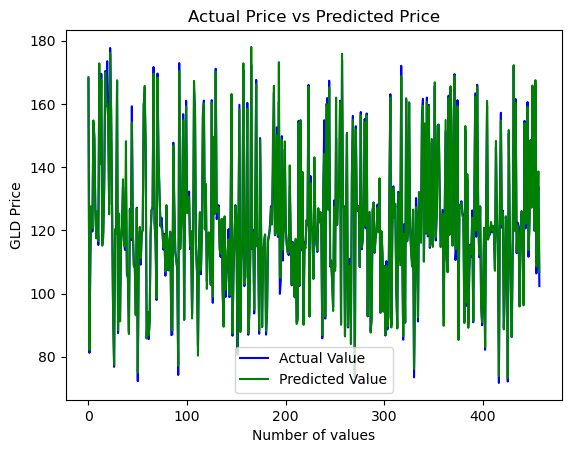

In [40]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()